In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import seaborn as sns
import os
import matplotlib.pyplot as plt
import datetime



#file names

calender_file_name = 'calendar.csv'
listings_file_name = 'listings.csv'
review_file_name = 'reviews.csv'

reviews = pd.read_csv(review_file_name)
listings = pd.read_csv(listings_file_name)
calendar = pd.read_csv(calender_file_name)

In [2]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

# Exploratory Data Analysis

In the below section, I will be probing the dataset to select the questions I will be considering


In [3]:
calendar.head(20)


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
5,12147973,2017-08-31,f,NaN
6,12147973,2017-08-30,f,NaN
7,12147973,2017-08-29,f,NaN
8,12147973,2017-08-28,f,NaN
9,12147973,2017-08-27,f,NaN


Calendar seems to show the listing name, availability, and the price for each day

In [4]:
calendar['listing_id'].value_counts().keys()

Int64Index([12898806, 14710769,  7018497,  3946215,   951473,  5718921,
             3278624, 13624476,  9626428, 12175961,
            ...
              973695,  6181230, 10434883,  5026613, 14340601, 13951039,
            13512551,  5270703,   901914,  3250739],
           dtype='int64', length=3585)

We have around 3600 listings

In [5]:
listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


Listings has a large number of columns, outputted below. Let's see if the ID here matches the calendar listing_id

In [6]:
print(listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [7]:
reviews.head(20)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
5,1178162,5198929,2013-06-17,6663826,Arndt,A truely exeptional place to stay. The hosts a...
6,1178162,6702817,2013-08-21,8099222,Maurice,It was a really nice time in Boston - best pla...
7,1178162,6873023,2013-08-28,7671888,Elodie,"Islam is a very nice guy ! Attentive, funny, h..."
8,1178162,7646702,2013-09-28,8197342,Arkadiusz,"The place is really well furnished, pleasant a..."
9,1178162,8094418,2013-10-15,9040491,Matthew,Our stay at Islam's place was fantastic. We co...


In [8]:
calendar_ids = sorted(calendar['listing_id'].value_counts().keys().tolist())
review_ids = sorted(reviews['listing_id'].value_counts().keys().tolist())
listing_ids = sorted(listings['id'].value_counts().keys().tolist())

In [9]:
print(len(calendar_ids))
print(len(review_ids))
print(len(listing_ids))

3585
2829
3585


# Calendar & Listing have the same number of listings. Meaning Not all units have reviews; up to around 20% 
We might be able to leverage the number of reviews a unit has (or lack thereof) to understand occupancy

In [10]:
reviews['comments'][0]

"My stay at islam's place was really cool! Good location, 5min away from subway, then 10min from downtown. The room was nice, all place was clean. Islam managed pretty well our arrival, even if it was last minute ;) i do recommand this place to any airbnb user :)"

In [11]:
listings['cancellation_policy'].value_counts()

strict             1582
flexible            999
moderate            919
super_strict_30      85
Name: cancellation_policy, dtype: int64

In [12]:
listings['city'].value_counts()


Boston                       3381
Roxbury Crossing               24
Somerville                     19
Jamaica Plain                  18
Brookline                      18
Cambridge                      16
Charlestown                    15
Brighton                       15
Dorchester                     15
Allston                        12
Roslindale                      6
West Roxbury                    5
ROXBURY CROSSING                4
East Boston                     3
Mattapan                        3
South Boston                    2
Jamaica Plain, Boston           2
ALLSTON                         2
Boston, Massachusetts, US       2
Jamaica Plain                   2
Hyde Park                       2
Boston                          1
east Boston                     1
Mission Hill, Boston            1
Jamaica Plain (Boston)          1
Milton                          1
Newton                          1
Jamaica plain                   1
Brighton                        1
Roslindale, Bo

# Possible features:
### 1) Number of reviews
### 2) Average number of words per comment\n
### 3)Number of repeat visits
### 4) Description length
### 5) Cancellation policy

# Questions to look at 
#### 1) relationship between number/length of reviews and % of listed dates available
#### 2) % of vacancies by time of year (Best time to list)
#### 3) Price vs Rating
#### 4) Relationship between availability and price of rental
#### 5) Main factors influencing occupancy rate




In [13]:
# Creating the features
#1) number of reviews
#create df holding number of reviews, and merge it with the listing
review_count = reviews.groupby('listing_id')['comments'].count()


#2) Average number of words per comment
reviews['word_count'] = reviews['comments'].apply(lambda x: len(x.split(' ')) if type(x) == str else 0)
#review_word_count = reviews.groupby('listing_id')['word_count'].average()

#3) Repeat visits - gathered from number of repeated reviews

def calculate_repeat_visits(listing_id,reviews_df = reviews, listing_id_column_in_reviews_df = 'listing_id'):
    '''For 'listing_id' == 1178162, should return 1'''
    
    return reviews_df[reviews_df[listing_id_column_in_reviews_df] == listing_id]['reviewer_id'].count() - reviews_df[reviews_df[listing_id_column_in_reviews_df] == listing_id]['reviewer_id'].nunique()
listings['number of repeat visits'] = listings['id'].apply(lambda x: calculate_repeat_visits(x))

#4) Description length in words

listings['Description_length'] = listings['description'].apply(lambda x: len(x.split(' ')) if type(x) == str else 0)

#5) Cancellation policy

cancellation_policy = pd.get_dummies(listings['cancellation_policy'],drop_first = False)
listings = pd.concat([listings.loc[:,listings.columns != 'cancellation_policy'],cancellation_policy],axis = 1)

#6)
weekday_dict = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
calendar['day_of_week'] = calendar['date'].apply(lambda x: weekday_dict[datetime.date(year = int(x.split('-')[0]), month = int(x.split('-')[1]), day = int(x.split('-')[2])).isoweekday()])




In [14]:
listings.loc[:,'host_is_superhost'] = listings['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)


# Questions to look at 
#### 1) relationship between number/length of reviews and % of listed dates available
#### 2) % of vacancies by time of year (Best time to list)
#### 3) Relationship between availability and price of rental

In [15]:
#### 1) relationship between number/length of reviews and % of listed dates available
#to gather this info, we need the % of dates available.
calendar.loc[:,'available'] = calendar['available'].apply(lambda x: 1 if x == 't' else 0)

def get_pct_available_from_calendar_for_an_id( _id,calendar = calendar):
    return 100*calendar[calendar['listing_id']==_id]['available'].mean()

listings['% available'] = listings['id'].apply(lambda x: get_pct_available_from_calendar_for_an_id( _id = x, calendar = calendar))

listings['% occupied'] = listings['% available'].apply(lambda x: 100 - x)

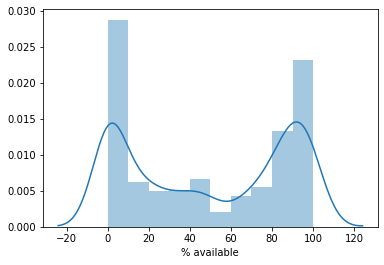

In [16]:
sns.distplot(listings['% available'])

In [17]:
numerical_listings = listings.loc[:,listings.dtypes != object]
#drop any column that is all NAs
numerical_listings.dropna(axis = 1, how = 'all',inplace = True)

<ipython-input-17-75f071cfc656>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_listings.dropna(axis = 1, how = 'all',inplace = True)


In [18]:
numerical_listings.columns
columns_to_investigate = [ 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'number of repeat visits', 'Description_length',
       'flexible', 'moderate', 'strict', 'super_strict_30','host_is_superhost', '% occupied']

# What are the biggest factors that influence how often a listing is available?

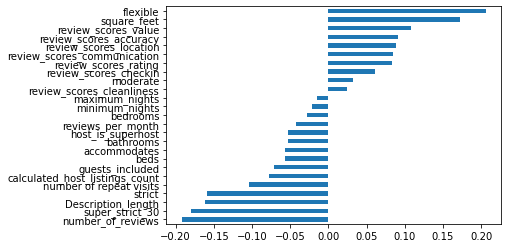

In [19]:
numerical_listings[columns_to_investigate].corr()['% occupied'].drop('% occupied').sort_values().plot(kind = 'barh')

This graph tells us that the number of reviews, having a strict cancellation policy, and a long description for your listing, are the off-putting to rentals! Leading to a higher rate of vacancy for a listing.
On the other hand, a flexible booking policy, a higher square foot-age (duh!) and a high review score for accuracy, seem to have the most positive effect on getting people to rent your property/

Features that didn't swing heavily either way were 
 1) Minimum nights
 2) Maximum nights
 3) Number of bedrooms
 4) Number of bathrooms.

# Question 2!
# What is the Best time to list?
By looking at the listing date, and the % of rentals that were vacant, in combination with the number of listed rentals, we can get a good idea of when there's a surge in rental activity in Boston!


In [20]:
calendar.head(10)

,listing_id,date,available,price,day_of_week
0,12147973,2017-09-05,0,NaN,Tuesday
1,12147973,2017-09-04,0,NaN,Monday
2,12147973,2017-09-03,0,NaN,Sunday
3,12147973,2017-09-02,0,NaN,Saturday
4,12147973,2017-09-01,0,NaN,Friday
5,12147973,2017-08-31,0,NaN,Thursday
6,12147973,2017-08-30,0,NaN,Wednesday
7,12147973,2017-08-29,0,NaN,Tuesday
8,12147973,2017-08-28,0,NaN,Monday
9,12147973,2017-08-27,0,NaN,Sunday


In [21]:
print('Start date of dataset is {}\n End date of dataset is {}'.format(calendar.date.min(),calendar.date.max()))

Start date of dataset is 2016-09-06
 End date of dataset is 2017-09-05


In [22]:
calendar['mm_dd'] = calendar['date'].apply(lambda x: str(x.split('-')[1])+'-' +str(x.split('-')[2]))

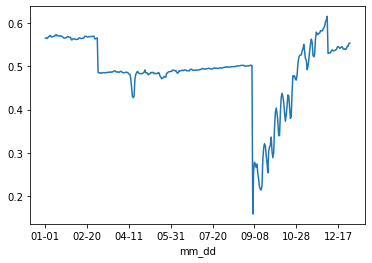

In [23]:
calendar.groupby(by = 'mm_dd')['available'].mean().plot()

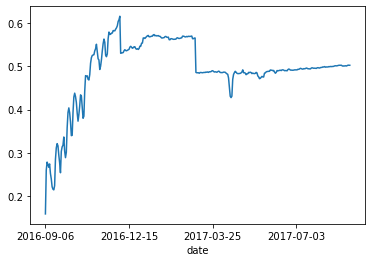

In [24]:
fig, ax = plt.subplots(1)
ax.locator_params(axis='x', nbins=6)
calendar.groupby(by = 'date')['available'].mean().plot(ax = ax)

# It seems like the winter isn't a great time to be leasing!
But the winter in Boston is so cold! Anyone could've told you that.
Let's look at the relationship between The rental prices and the calendar year

/Users/omargurashi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


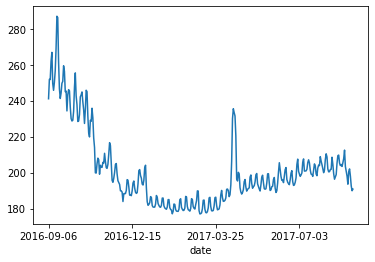

In [25]:
vacant = calendar[calendar['available']== 1]
vacant.loc[:,'price'] = vacant['price'].apply(lambda x: x.replace('$',''))
vacant.loc[:,'price'] = vacant['price'].apply(lambda x: x.replace(',',''))
vacant.loc[:,'price'] = vacant['price'].apply(lambda x: int(x.split('.')[0]))



fig, ax = plt.subplots(1)
ax.locator_params(axis='x', nbins=6)
vacant.groupby(by = 'date')['price'].mean().plot(ax = ax)

In [26]:
vacant[vacant['available']== 1]['price'].max()

7163

It looks like there's one particular weekend where the availability drops, and the price skyrockets!
Let's see what weekend that is

In [27]:
availability_in_spike_range = calendar[(calendar['date']>'2017-03-25') & (calendar['date']<'2017-07-03')].groupby(by = 'date')['available'].mean()

Minimum availability is on 2017-04-16, where there was a massive price drop for 3 days


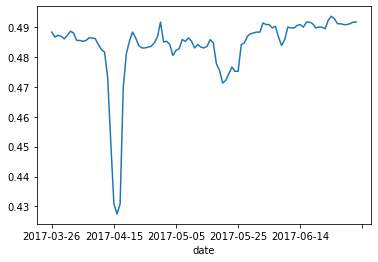

In [28]:
print('Minimum availability is on {}, where there was a massive price drop for 3 days'.format(availability_in_spike_range[availability_in_spike_range == availability_in_spike_range.min()].keys()[0]))
availability_in_spike_range.plot()#[availability_in_spike_range == availability_in_spike_range.min()]


It looks like the day of the boston marathon is a great day to have an airbnb in Boston!
Let's see what happens to prices in that time

date
2017-04-15    235.501618
Name: price, dtype: float64

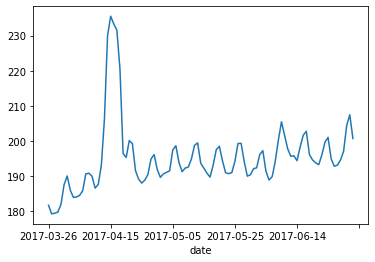

In [29]:
price_in_spike_range = vacant[(vacant['date']>'2017-03-25') & (vacant['date']<'2017-07-03')].groupby(by = 'date')['price'].mean()



price_in_spike_range.plot()
price_in_spike_range[price_in_spike_range == price_in_spike_range.max()]



## Large events seem to boost prices and reduce availability. What about days of week?
Are weekends more likely to net you a higher price?

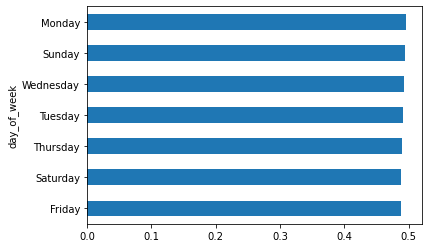

In [30]:
calendar.groupby('day_of_week')['available'].mean().sort_values().plot(kind = 'barh')

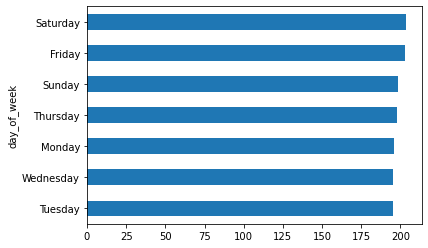

In [31]:
vacant.groupby('day_of_week')['price'].mean().sort_values().plot(kind = 'barh')

# Question 3:
What is the relationship between Price & Rating?



In [32]:
def get_listing_average_price(listing_id):
    return vacant[vacant['listing_id'] == listing_id]['price'].mean()

listings['average_price'] = listings['id'].apply(lambda x: get_listing_average_price(x))

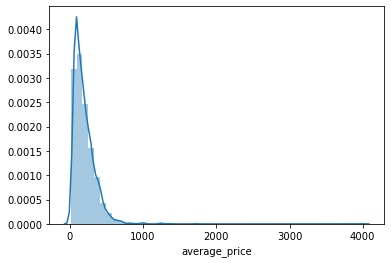

In [33]:
#this is the distribution of prices
sns.distplot(listings['average_price'])

# Let's take a look at the overall trend

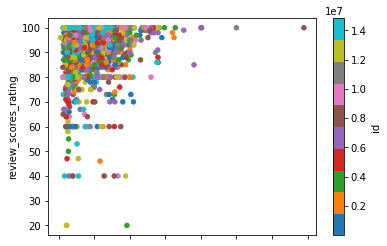

In [34]:
listings.plot(kind = 'scatter',x = 'average_price',y = 'review_scores_rating',c = 'id',cmap = 'tab10' )

From this rough overview, we can see that while the vast majority of cheaper listings are high in satisfaction, the overall quality does increase when entering the top 1% of listings

In [35]:
# to keep certain factors constant, let's look at the largest category of listings
print(list(listings.columns))
listings.groupby(by = ['room_type','neighbourhood'])['id'].count().sort_values(ascending = False)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

room_type        neighbourhood    
Entire home/apt  Back Bay             251
                 South End            231
Private room     Allston-Brighton     209
Entire home/apt  Fenway/Kenmore       187
Private room     Jamaica Plain        167
                                     ... 
Shared room      Mattapan               1
                 Hyde Park              1
                 Downtown Crossing      1
Entire home/apt  Mattapan               1
Shared room      West End               1
Name: id, Length: 76, dtype: int64

In [36]:
listings_to_study = listings.groupby(by = ['room_type','neighbourhood'])['id'].count().sort_values(ascending = False).reset_index()[:10]

In [37]:
#We're gonna look at the top 10 neighborhood/house-types, and look at how the rating scales with price 
#for each listing type, we'll split the listings into 4 windows, primarily the 25th, 50th, and 75th, and 95th percentiles

class area_study(object):
    # plot how the overall rating relates to price
    
    def __init__(self, area_type,listings,quantiles = [.25,.5,.75,.95],ax=None):
        self.area = area_type[0]
        self.type = area_type[1]
        self.quantiles = quantiles
        
        if ax == None:
            fig, ax = plt.subplots(1)
            self.ax = ax
        else:
            self.ax = ax

        self.category_names = ['Lowest','Middle','High','Ultra-high','Top-Tier']
        
    def get_data(self):
        self.df = listings[(listings['neighbourhood']==self.area) & (listings['room_type'] == self.type)]

    def get_price_ranges(self):
        self.df['average_price'].dropna(how = any, axis = 0,inplace = True)
        prices = self.df['average_price']
        self.quantile_values = [np.quantile(prices,i) for i in self.quantiles]
        #print(self.quantiles)
        #print(self.quantile_values)
    def price_category_mapping(self,entry,quantiles):
        reversed_quantiles = quantiles[::-1]
        for index, quantile in enumerate(reversed_quantiles):
            if entry > quantile:
                return index
                
    def prepare_price_categories(self):
        self.df['price_category'] = pd.Series(np.zeros(self.df.shape[0])).astype(int)
        self.df.loc[:,'price_category'] = self.df['average_price'].apply(lambda price: self.price_category_mapping(price,self.quantile_values))
        #print(self.df['price_category'].value_counts().keys())
        #print(self.df)
    def plot_category_vs_ratings(self):
        colors = ['y','c','g','b','r','m']
        price_categories = list(self.df['price_category'].value_counts().keys())
        cat_dict = {self.category_names[index]:str(price_categories[index]) for index in range(len(price_categories))}
        #print(cat_dict)
        #print(price_categories)
        self.ax.set_title('{} - {}'.format(self.type,self.area))
        self.df.plot.scatter(x = 'average_price',y = 'review_scores_rating', c = 'price_category',cmap = 'tab10_r',ax=self.ax,legend = False)#,ax = ax)
        self.ax.set_ylim([40,100])
        handles, labels = self.ax.get_legend_handles_labels()

    
    

/Users/omargurashi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)
<ipython-input-37-717690f0c6e2>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['price_category'] = pd.Series(np.zeros(self.df.shape[0])).astype(int)
/Users/omargurashi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

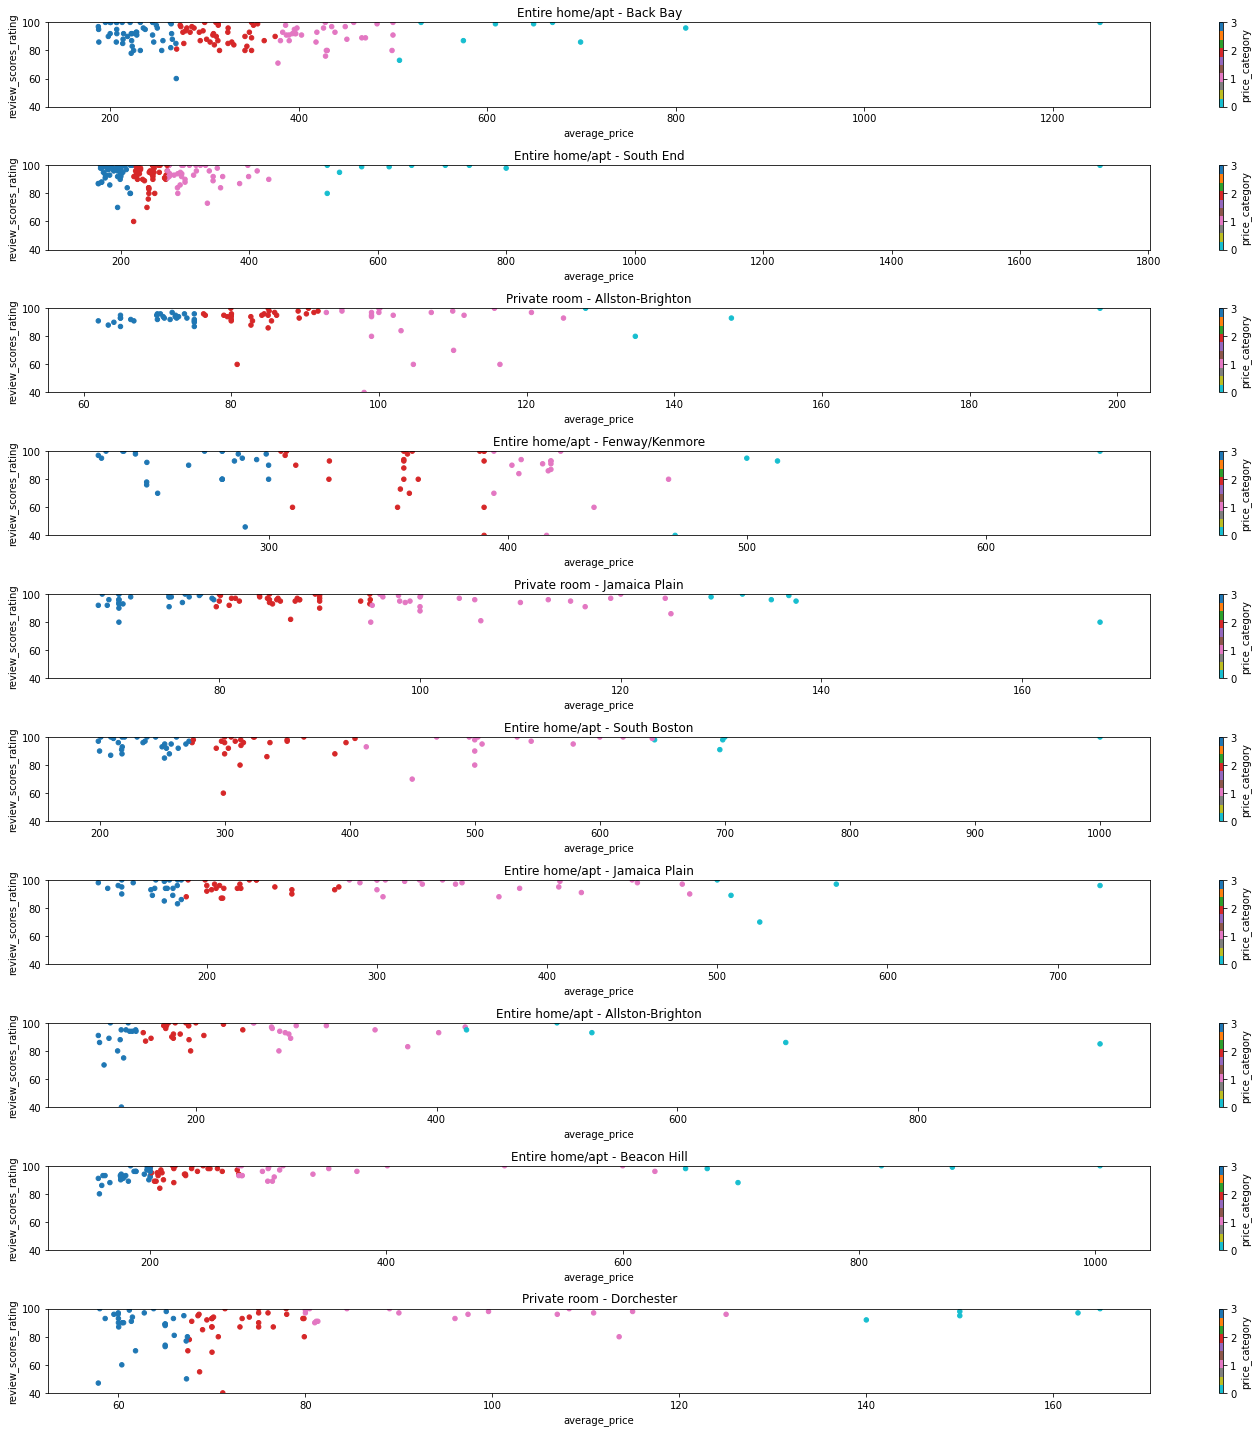

In [38]:
fig, ax = plt.subplots(10,figsize = (20,20),tight_layout = True)
#fig.subplots_adjust()
for index, row in enumerate(listings_to_study.iterrows()):

    area_to_study = row[1]['neighbourhood']
    room_type = row[1]['room_type']
    study = area_study([area_to_study,room_type],listings,ax = ax[index])
    study.get_data()
    study.get_price_ranges()
    study.prepare_price_categories()
    study.plot_category_vs_ratings()


# Most reviews seem to be positive, and while there are a few cases where you get what you pay for, the graphs don't represent the facts of the matter, let's look at the numerical breakdown here
We'll be seperating the prices into quartiles, and looking at the average review for each.

In [39]:
quantiles = [.25,.5,.75,.95]
print(quantiles)
def price_category_mapping(entry,quantiles):
    reversed_quantiles = quantiles[::-1]
    categories = ['Most expensive','Expensive','Average','Budget','Lowest Price']


    for index, quantile in enumerate(reversed_quantiles):
        if entry > quantile:
            #print(entry, quantile)
            #print(index)
            return index
        
temp_listings = listings[~listings['average_price'].isna()]
quantiles = [.25,.5,.75,.95]
prices = temp_listings['average_price'].values
quantile_values = [np.quantile(prices,i) for i in quantiles]
quantile_values.insert(0,0)

temp_listings.loc[:,'price_category'] = temp_listings['average_price'].apply(lambda price: price_category_mapping(price,quantile_values))





[0.25, 0.5, 0.75, 0.95]


/Users/omargurashi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [40]:
listing_price_rating_breakdown = temp_listings.groupby(['neighbourhood','room_type','price_category'])['review_scores_rating'].mean().reset_index()

In [41]:
temp_listings['price_category'].value_counts()

Lowest Price      735
Budget            731
Average           713
Expensive         581
Most expensive    146
Name: price_category, dtype: int64

In [42]:
listing_price_rating_breakdown.head(200)

,neighbourhood,room_type,price_category,review_scores_rating
0,Allston-Brighton,Entire home/apt,Average,95.043478
1,Allston-Brighton,Entire home/apt,Budget,88.966667
2,Allston-Brighton,Entire home/apt,Expensive,92.250000
3,Allston-Brighton,Entire home/apt,Lowest Price,91.500000
4,Allston-Brighton,Entire home/apt,Most expensive,91.000000
...,...,...,...,...
185,West Roxbury,Entire home/apt,Average,95.000000
186,West Roxbury,Entire home/apt,Budget,97.500000
187,West Roxbury,Entire home/apt,Expensive,100.000000
188,West Roxbury,Private room,Budget,100.000000


# It seems like the bottom quartile of prices (<90 dollars) typically get worse reviews, the trend breaks down in other cases.
In conclusion, the higher 

# With ~74% of listings getting a score of above 90%, we realize that there is a skew when it comes to reviews. We will break down the review scores into categories, and see whether the price correlates with the reviews

Draw a heatmap for price and review category for each neighborhood/room_type
Maybe look at how room type influences review category as well

In [43]:
boxes = [np.quantile(listings['review_scores_rating'].dropna(),i) for i in [.26,.35,.46,.56,.66,.76,.86]]
def rating_category_mapping(entry,quantiles):
    reversed_quantiles = quantiles[::-1]
    categories = ['excellent','good','acceptable','average','poor','very poor','worst rated']
    for index, quantile in enumerate(reversed_quantiles):
        if entry > quantile:
            return index


In [44]:
listings['review_scores_rating_category'] = listings['review_scores_rating'].apply(lambda entry: rating_category_mapping(entry,boxes))

In [45]:
print(boxes)
listings['review_scores_rating_category'].value_counts()

[90.0, 91.0, 93.0, 95.0, 97.0, 99.0, 100.0]


good           628
average        365
very poor      310
poor           280
acceptable     218
worst rated     88
Name: review_scores_rating_category, dtype: int64

In [67]:
def dummy_column_creator(df,column_name,dummyna=True):
    #create dummies for column_name, and remove column_name from final df
    temp = pd.get_dummies(df[column_name],drop_first = True,dummy_na=dummyna,prefix=column_name)
    return pd.concat([temp,df.loc[:,df.columns!=column_name]])
listings.loc[:,'price_category'] = listings['average_price'].apply(lambda price: price_category_mapping(price,quantile_values))
listings = dummy_column_creator(listings,'review_scores_rating_category')
listings = dummy_column_creator(listings,'price_category')
listings = dummy_column_creator(listings,'room_type')
listings = dummy_column_creator(listings,'neighbourhood')




KeyError: 'review_scores_rating_category'

In [51]:
listings['instant_bookable'].replace(np.nan,0,inplace=True)
listings['instant_bookable'].replace('f',0,inplace=True)
listings['instant_bookable'].replace('t',1,inplace=True)

In [52]:
list(listings.columns)

['neighbourhood_Back Bay',
 'neighbourhood_Beacon Hill',
 'neighbourhood_Brookline',
 'neighbourhood_Cambridge',
 'neighbourhood_Charlestown',
 'neighbourhood_Chestnut Hill',
 'neighbourhood_Chinatown',
 'neighbourhood_Dorchester',
 'neighbourhood_Downtown',
 'neighbourhood_Downtown Crossing',
 'neighbourhood_East Boston',
 'neighbourhood_Fenway/Kenmore',
 'neighbourhood_Financial District',
 'neighbourhood_Government Center',
 'neighbourhood_Harvard Square',
 'neighbourhood_Hyde Park',
 'neighbourhood_Jamaica Plain',
 'neighbourhood_Leather District',
 'neighbourhood_Mattapan',
 'neighbourhood_Mission Hill',
 'neighbourhood_North End',
 'neighbourhood_Roslindale',
 'neighbourhood_Roxbury',
 'neighbourhood_Somerville',
 'neighbourhood_South Boston',
 'neighbourhood_South End',
 'neighbourhood_Theater District',
 'neighbourhood_West End',
 'neighbourhood_West Roxbury',
 'neighbourhood_nan',
 'room_type_Private room',
 'room_type_Shared room',
 'room_type_nan',
 'price_category_Budget',


In [62]:
columns_to_study = ['neighbourhood_Back Bay',
 'neighbourhood_Beacon Hill',
 'neighbourhood_Brookline',
 'neighbourhood_Cambridge',
 'neighbourhood_Charlestown',
 'neighbourhood_Chestnut Hill',
 'neighbourhood_Chinatown',
 'neighbourhood_Dorchester',
 'neighbourhood_Downtown',
 'neighbourhood_Downtown Crossing',
 'neighbourhood_East Boston',
 'neighbourhood_Fenway/Kenmore',
 'neighbourhood_Financial District',
 'neighbourhood_Government Center',
 'neighbourhood_Harvard Square',
 'neighbourhood_Hyde Park',
 'neighbourhood_Jamaica Plain',
 'neighbourhood_Leather District',
 'neighbourhood_Mattapan',
 'neighbourhood_Mission Hill',
 'neighbourhood_North End',
 'neighbourhood_Roslindale',
 'neighbourhood_Roxbury',
 'neighbourhood_Somerville',
 'neighbourhood_South Boston',
 'neighbourhood_South End',
 'neighbourhood_Theater District',
 'neighbourhood_West End',
 'neighbourhood_West Roxbury',
 'neighbourhood_nan',
#  'room_type_Private room',
#  'room_type_Shared room',
#  'room_type_nan',
#  'price_category_Budget',
#  'price_category_Expensive',
#  'price_category_Lowest Price',
#  'price_category_Most expensive',
#  'price_category_nan',
 'review_scores_rating_category_average',
 'review_scores_rating_category_good',
 'review_scores_rating_category_poor',
 'review_scores_rating_category_very poor',
 'review_scores_rating_category_worst rated',
 'review_scores_rating_category_nan']

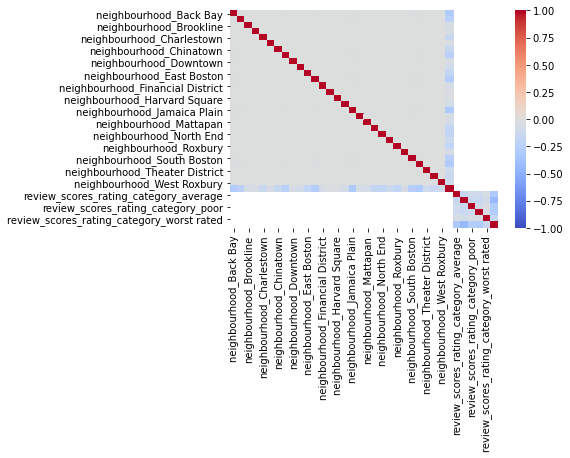

In [63]:
#based on https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f
myBasicCorr = listings[columns_to_study].corr()

#mask = np.zeros(myBasicCorr.shape, dtype=bool)
#mask[np.triu_indices(len(mask))] = True
sns.heatmap(myBasicCorr,vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = False)#, mask = mask)


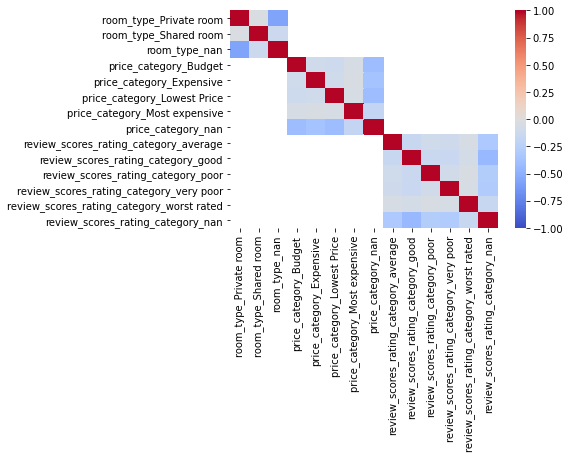

In [64]:
columns_to_study = [
     'room_type_Private room',
 'room_type_Shared room',
 'room_type_nan',
 'price_category_Budget',
 'price_category_Expensive',
 'price_category_Lowest Price',
 'price_category_Most expensive',
 'price_category_nan',
 'review_scores_rating_category_average',
 'review_scores_rating_category_good',
 'review_scores_rating_category_poor',
 'review_scores_rating_category_very poor',
 'review_scores_rating_category_worst rated',
 'review_scores_rating_category_nan']

#based on https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f
myBasicCorr = listings[columns_to_study].corr()

#mask = np.zeros(myBasicCorr.shape, dtype=bool)
#mask[np.triu_indices(len(mask))] = True
sns.heatmap(myBasicCorr,vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = False)#, mask = mask)

